In [1]:
import pandas as pd
import networkx as nx
from matplotlib.pyplot import figure
import numpy as np


In [2]:
dis = pd.read_csv("disease_interactome.csv")
dis = dis[['OFFICIAL_SYMBOL_A','OFFICIAL_SYMBOL_B']]
dis

,OFFICIAL_SYMBOL_A,OFFICIAL_SYMBOL_B
0,A2M,APOE
1,A2M,LEP
2,A2M,NGF
3,ABAT,ACP6
4,ABAT,ADSL
...,...,...
6138,ZNF746,IDH2
6139,ZNF76,LETM1
6140,ZNF836,TBCD
6141,ZSCAN29,ABAT


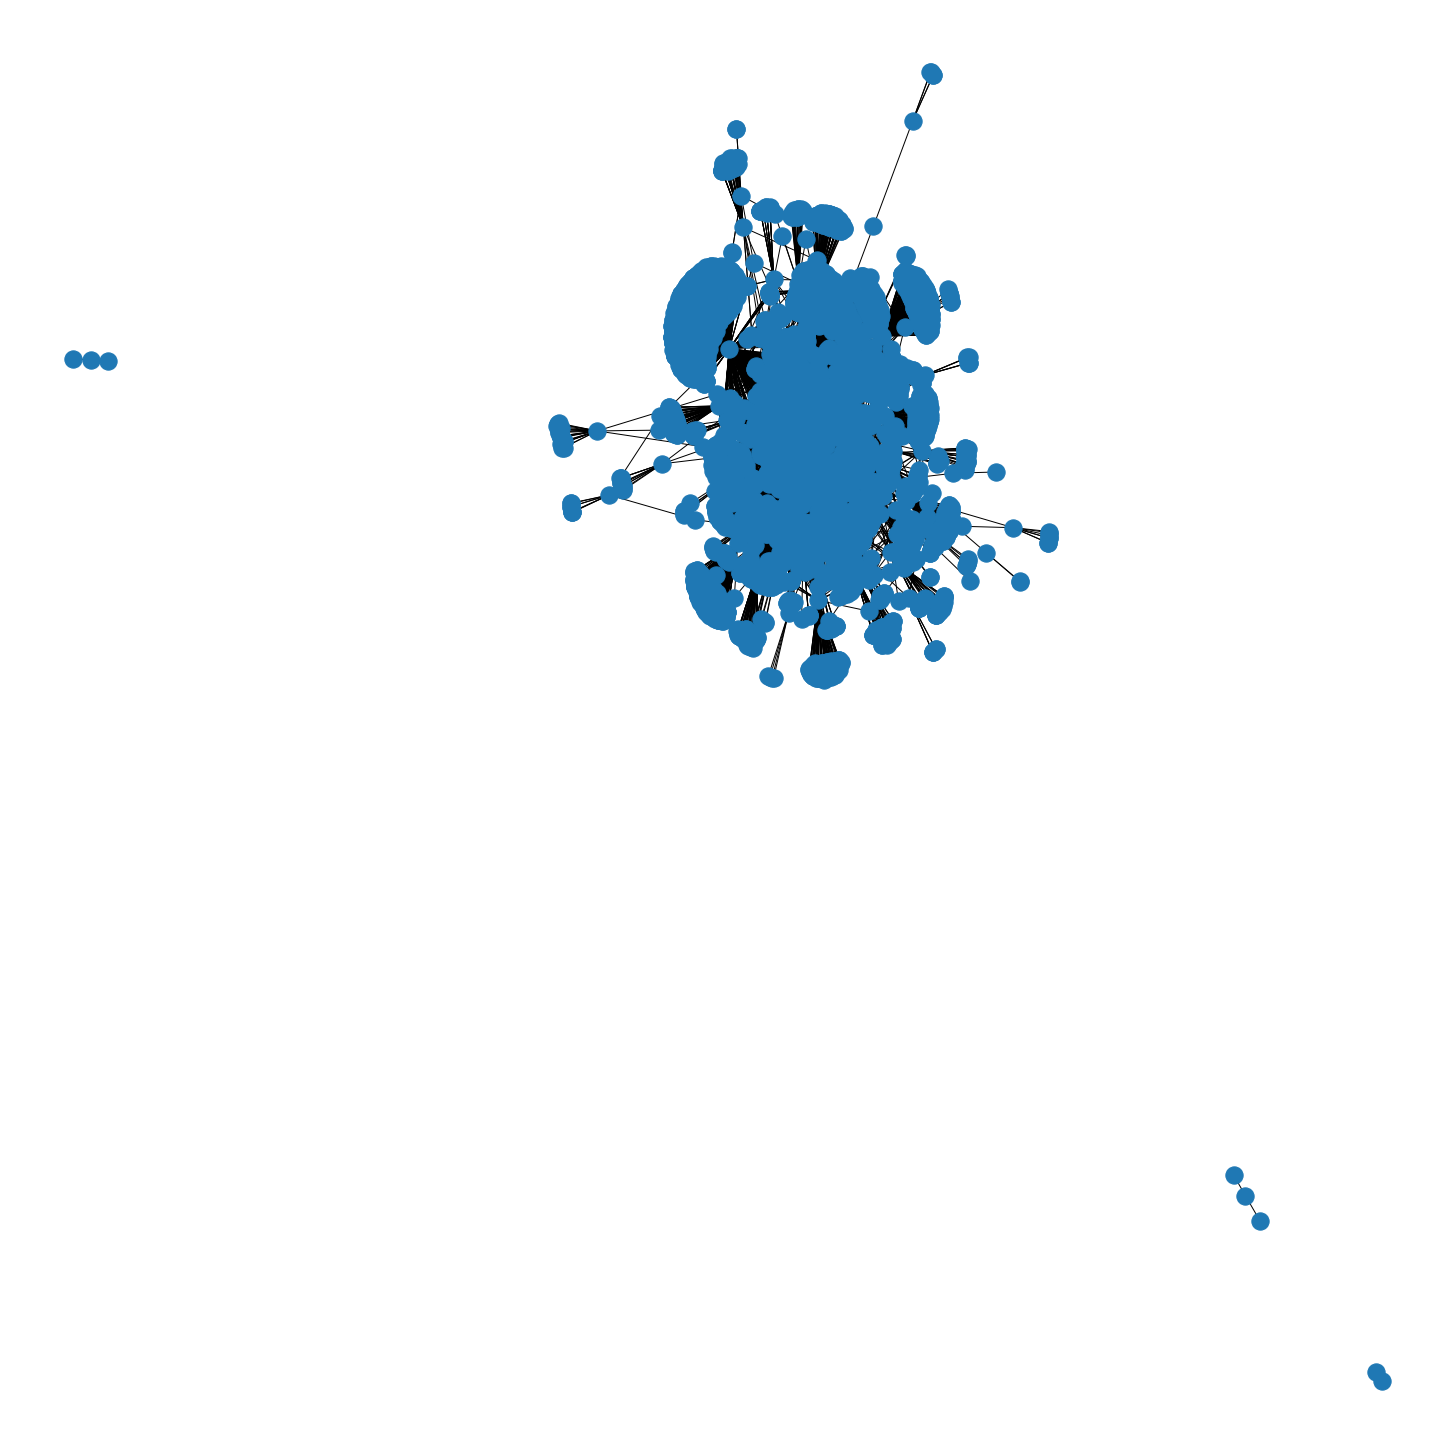

In [3]:
Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(dis, 'OFFICIAL_SYMBOL_A',	'OFFICIAL_SYMBOL_B', create_using=Graphtype)

figure(figsize=(20, 20))
nx.draw(G, with_labels=False)

In [4]:
#No. of nodes and no. of links
print("Number of nodes: ",len(G.nodes))
print("Number of links: ",len(G.edges))

Number of nodes:  4160
Number of links:  5767


In [5]:
# No. of connected components
nx.number_connected_components(G)

4

In [6]:
# No. of isolated nodes
len(list(nx.isolates(G)))

0

In [7]:
# Average degree
deg=[]
for el in G.degree:
  deg.append(el[1])
print("Average degree: ",round(sum(deg)/len(deg),3))

Average degree:  2.773


In [8]:
# Average clustering coefficient

nx.average_clustering(G)


0.0

In [9]:
# Centralization
round((len(G.nodes)/(len(G.nodes)-2))*((max(deg)/(len(G.nodes)-1)) - nx.density(G)),3)

0.243

In [10]:
#It's not possible to compute the radius, the diameter and the average path length of a unconnected graph

# 2.1 b - The largest connected component (LCC)

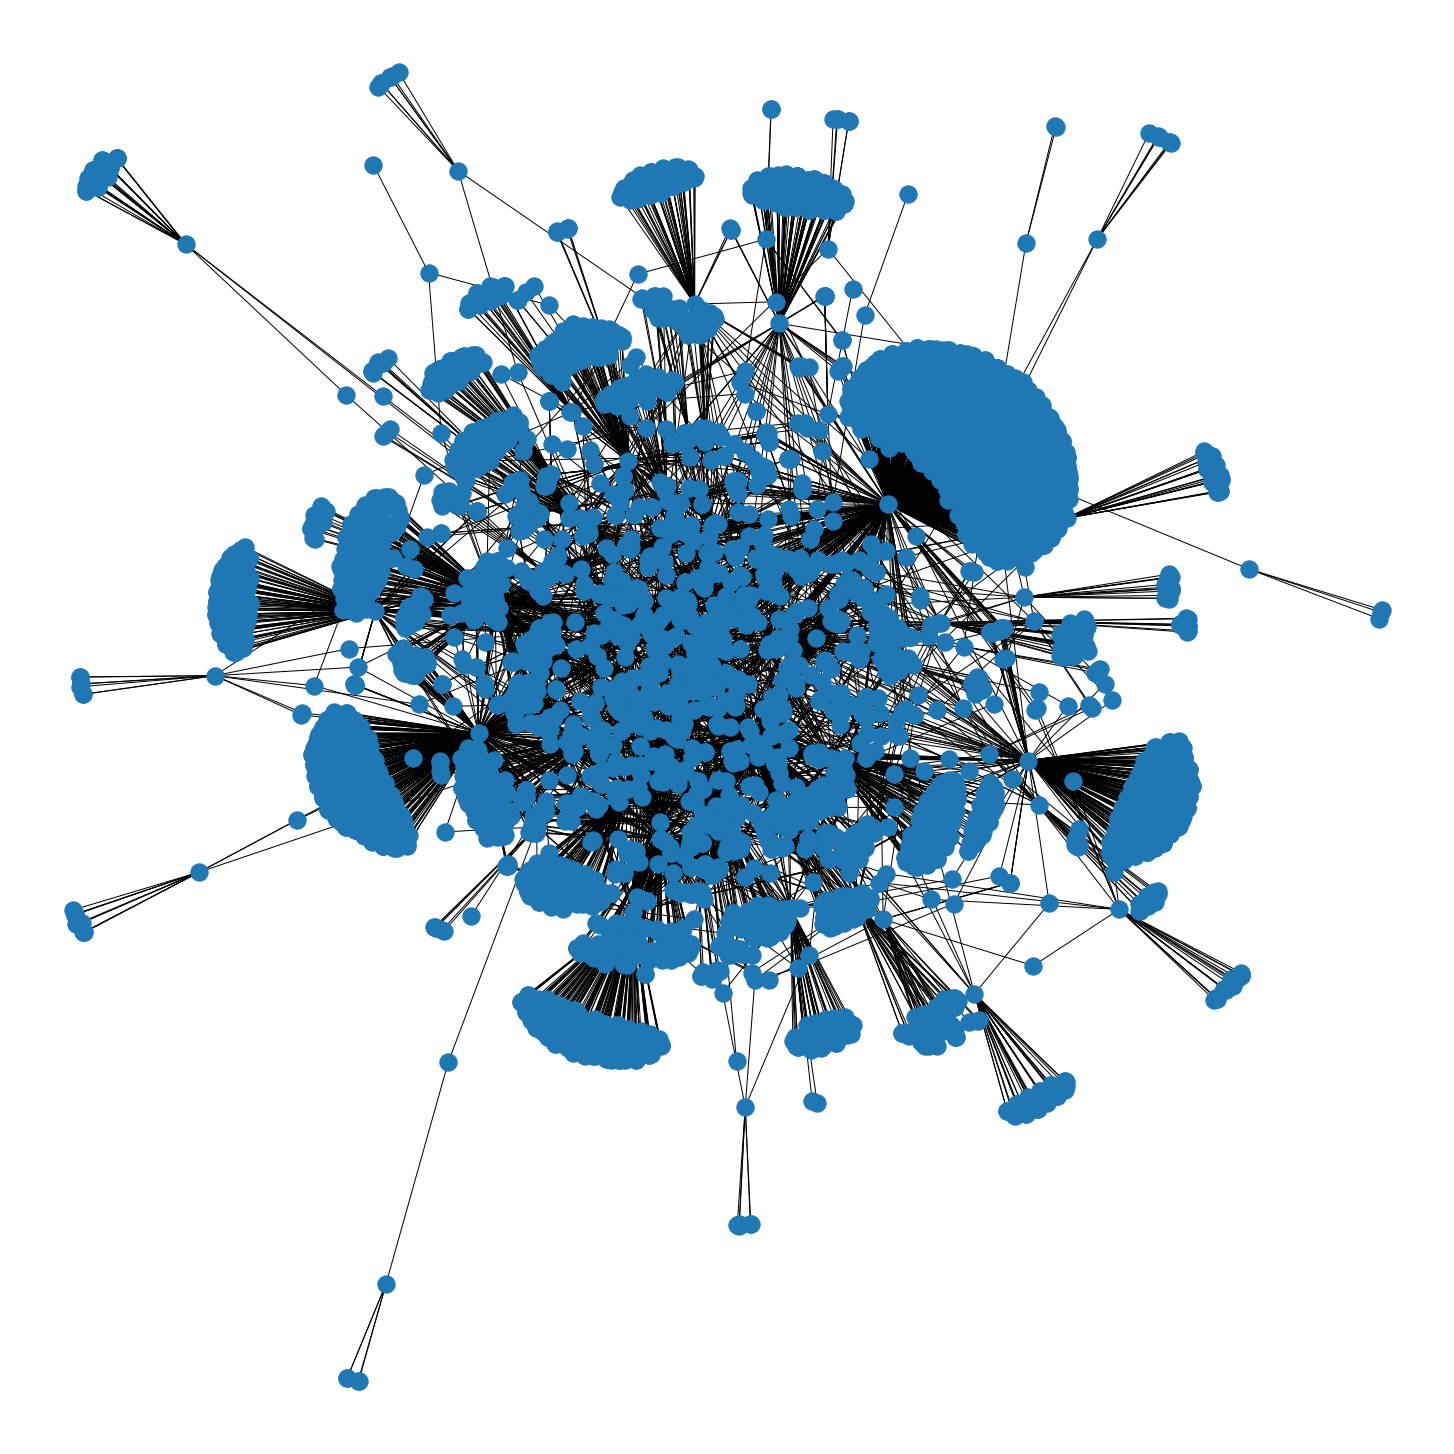

In [11]:
main_G = G.copy() # Network of the biggest connected component considering the whole graph
main_g = list(nx.connected_components(G))[0]

for i in range(1,4):
  for el in list(nx.connected_components(G))[i]:
    main_G.remove_node(el)


figure(figsize=(20, 20))
nx.draw(main_G, with_labels=False)

In [12]:
#No. of nodes and no. of links
print("Number of nodes: ",len(main_G.nodes))
print("Number of links: ",len(main_G.edges))

Number of nodes:  4152
Number of links:  5762


In [13]:
# Average degree
main_deg=[]
for el in main_G.degree:
  main_deg.append(el[1])
print("Average degree: ",round(sum(main_deg)/len(main_deg),3))

Average degree:  2.776


In [14]:

nx.average_clustering(main_G)

0.0

In [15]:
 # Network diameter & radius

print("The diameter of the main connected component is",nx.algorithms.distance_measures.diameter(main_G))
print("The radius of the main connected component is",nx.algorithms.distance_measures.radius(main_G))

The diameter of the main connected component is 10
The radius of the main connected component is 5


In [16]:
# Average path length
print("The average of the shortest path lenght in the main connected component is",round(nx.average_shortest_path_length(main_G),3))

The average of the shortest path lenght in the main connected component is 4.061


In [17]:
# Centralization 
round((len(main_G.nodes)/(len(main_G.nodes)-2))*((max(main_deg)/(len(main_G.nodes)-1)) - nx.density(main_G)),3)

0.244

In [18]:
##########################################################################################

In [19]:
centrality_matrix = pd.DataFrame(0,index=main_G.nodes,columns=['Degree','Betweennes','Eigenvector','Closeness','Betweennes/Degree'])
centrality_matrix['Degree'] = main_deg
centrality_matrix['Betweennes'] = nx.betweenness_centrality(main_G).values()
centrality_matrix['Eigenvector'] = nx.eigenvector_centrality(main_G, max_iter = 1000).values()
centrality_matrix['Closeness'] = nx.closeness_centrality(main_G).values()
centrality_matrix['Betweennes/Degree'] = centrality_matrix['Betweennes']/centrality_matrix['Degree']
centrality_matrix

,Degree,Betweennes,Eigenvector,Closeness,Betweennes/Degree
A2M,4,0.000526,0.000466,0.240596,0.000131
APOE,128,0.037029,0.012733,0.305963,0.000289
LEP,2,0.000013,0.000018,0.197281,0.000007
NGF,7,0.000838,0.000972,0.267548,0.000120
ABAT,42,0.012360,0.003015,0.269598,0.000294
...,...,...,...,...,...
ZNF746,1,0.000000,0.000330,0.236646,0.000000
ZNF76,1,0.000000,0.000419,0.237132,0.000000
ZNF836,1,0.000000,0.000418,0.239956,0.000000
ZSCAN29,1,0.000000,0.000094,0.212360,0.000000


In [25]:
centrality_matrix.sort_values(by=['Betweennes'],ascending=False).head(20)

,Degree,Betweennes,Eigenvector,Closeness,Betweennes/Degree
APEX1,1015,0.439051,0.696339,0.391419,0.000433
INS,482,0.186865,0.080626,0.349558,0.000388
TCF4,272,0.115202,0.026612,0.331047,0.000424
MIB1,239,0.091095,0.025623,0.321858,0.000381
REST,249,0.074913,0.046089,0.326003,0.000301
CLU,157,0.064834,0.018905,0.327754,0.000413
MECP2,166,0.055430,0.019083,0.314494,0.000334
NOS2,173,0.054755,0.024584,0.320120,0.000317
TSC1,161,0.053338,0.016402,0.322709,0.000331
OPRM1,131,0.052573,0.007236,0.301781,0.000401


In [26]:
intro = "From studies of Hausser-Hauw and Bancaud results that the 4% of patients investigated for intractable epilepsy have gustatory hallucinations as part of their seizures."
len(intro.split(" "))

24